<span style="font-size:3em; text-align:center">Anomaly-based Intrusion Detection System - </span>

<span style="font-size:3em; text-align:center">CIC-IDS2017 Dataset</span>

In [1]:
import pandas as pd
import glob
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [2]:
# Saving all .csv files in folder to list.
path = "dataset_list/MachineLearningCVE/"
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [3]:
[print(f) for f in files]

dataset_list/MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
dataset_list/MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [4]:
# Reading all the csv files into dataframes and putting those DFs to list.

dataset = [pd.read_csv(f) for f in files]

In [5]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(225745, 79)
(286467, 79)
(191033, 79)
(529918, 79)
(288602, 79)
(170366, 79)
(445909, 79)
(692703, 79)


# We already established that all tables have the same number of columns, but are they the same columns? Let's check this out!

In [6]:
for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# Concatenation of csv dataset files

In [7]:
# Combining all tables into one dataset.

dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)
col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names

In [8]:
# By checking the shape of dataset we can confirm that concatenation has been successfully implemented.

dataset.shape

(2427193, 79)

# Data analysis

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DestinationPort          int64  
 1   FlowDuration             int64  
 2   TotalFwdPackets          int64  
 3   TotalBackwardPackets     int64  
 4   TotalLengthofFwdPackets  int64  
 5   TotalLengthofBwdPackets  int64  
 6   FwdPacketLengthMax       int64  
 7   FwdPacketLengthMin       int64  
 8   FwdPacketLengthMean      float64
 9   FwdPacketLengthStd       float64
 10  BwdPacketLengthMax       int64  
 11  BwdPacketLengthMin       int64  
 12  BwdPacketLengthMean      float64
 13  BwdPacketLengthStd       float64
 14  FlowBytes/s              float64
 15  FlowPackets/s            float64
 16  FlowIATMean              float64
 17  FlowIATStd               float64
 18  FlowIATMax               int64  
 19  FlowIATMin               int64  
 20  FwdIATTotal              int64  
 21  FwdIATMe

In [10]:
dataset.describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,...,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06
mean,8.887218e+03,1.722299e+07,1.061457e+01,1.197127e+01,6.337711e+02,1.884117e+04,2.393483e+02,1.916761e+01,6.516700e+01,8.029052e+01,...,6.218988e+00,-3.202190e+03,9.511021e+04,4.797316e+04,1.786510e+05,6.798820e+04,9.696673e+06,5.876141e+05,1.013952e+07,9.234826e+06
std,1.925879e+04,3.574909e+07,8.095918e+02,1.077107e+03,1.078985e+04,2.443980e+06,7.696329e+02,6.151622e+01,1.989624e+02,3.021573e+02,...,6.872956e+02,1.171719e+06,6.995254e+05,4.244406e+05,1.105770e+06,6.226939e+05,2.525299e+07,4.965976e+06,2.603281e+07,2.498687e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.350000e+02,2.000000e+00,1.000000e+00,2.400000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.049300e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.620000e+02,4.100000e+01,2.000000e+00,3.700000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.558409e+06,6.000000e+00,5.000000e+00,3.470000e+02,1.592000e+03,2.280000e+02,3.700000e+01,5.300000e+01,7.868654e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


Upon further inspection we can see that dataset contains 15 labels. Labels represent network/web attacks and BENIGN state which is the network traffic during normal business day. 

In [11]:
print(dataset['Label'].unique())
len(dataset['Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


15

In [12]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = dataset['Label'].where(dataset['Label'] != "BENIGN")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'DDoS'),
  Text(1, 0, 'PortScan'),
  Text(2, 0, 'Bot'),
  Text(3, 0, 'Infiltration'),
  Text(4, 0, 'Web Attack � Brute Force'),
  Text(5, 0, 'Web Attack � XSS'),
  Text(6, 0, 'Web Attack � Sql Injection'),
  Text(7, 0, 'FTP-Patator'),
  Text(8, 0, 'SSH-Patator'),
  Text(9, 0, 'DoS slowloris'),
  Text(10, 0, 'DoS Slowhttptest'),
  Text(11, 0, 'DoS Hulk'),
  Text(12, 0, 'DoS GoldenEye'),
  Text(13, 0, 'Heartbleed')])

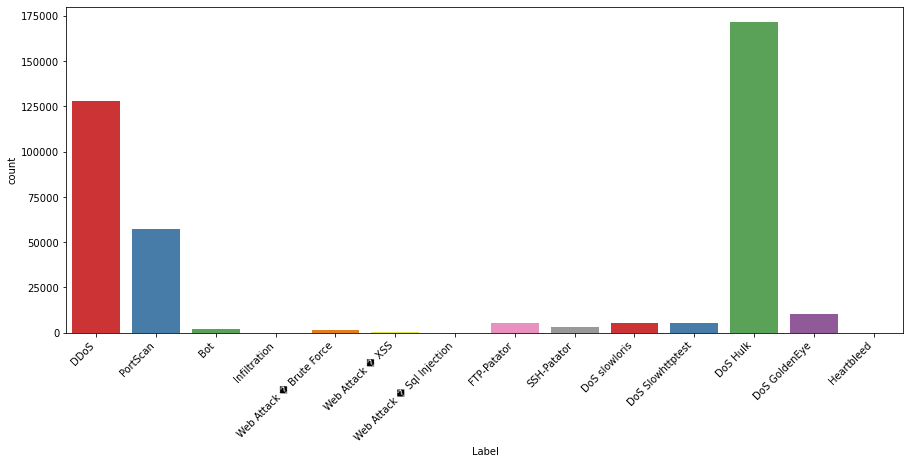

In [15]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

# Renaming columns and Data Cleaning

In [16]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
# Here we can see that 'Label' column contains some weird characters. 

dataset["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [18]:
label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [19]:
labels = dataset['Label'].unique()

for i in range(0,len(label_names)):
    dataset['Label'] = dataset['Label'].replace({labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [20]:
len(dataset['Label'].unique())

15

In [21]:
# Save cleaned dataset.

#dataset.to_csv("Dataset_clean.csv", index=False)

## Removing NULL values

In [22]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
dataset.isnull().values.any()

True

In [24]:
[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s']

In [25]:
dataset['FlowBytes/s'].isnull().sum()

334

In [26]:
334/dataset.shape[0]*100

0.013760751617197316

In [27]:
before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

334

In [28]:
dataset.isnull().any().any()

False

## Removing *non-finite* values

In [29]:
dataset

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427188,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2427189,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2427190,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2427191,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [30]:
dataset.shape

(2426859, 79)

In [31]:
dataset = dataset.convert_dtypes()
dataset = dataset[dataset.select_dtypes(include=[np.number]).ge(0).all(1)]
print(dataset.shape)
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'] #.astype('float64')

(1264359, 79)


In [32]:
dataset

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
7,54925,42,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
14,36206,54,1,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427182,443,392,3,1,18,6,6,6,6.0,0.0,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
2427184,35450,33,1,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2427186,80,11512230,5,5,672,3525,672,0,134.4,300.527536,...,1,32,821.0,0.0,821,821,6506213.0,0.0,6506213,6506213
2427187,49346,145,1,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [33]:
np.all(np.isfinite(dataset))

False

In [34]:
nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [35]:

finite = np.isfinite(dataset['FlowBytes/s']).sum()

dataset.shape[0] - finite

613

In [36]:
finite = np.isfinite(dataset['FlowPackets/s']).sum()

dataset.shape[0] - finite

613

In [37]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [38]:
np.any(np.isnan(dataset))

False

In [39]:
dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [40]:
dataset.dropna(inplace=True)

In [41]:
dataset.shape

(1263746, 79)

In [42]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14,36206,54,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [43]:
#Saving cleaned dataset.
#dataset.to_csv("Dataset_clean_dropna.csv", index=False)

In [44]:
from sklearn.decomposition import PCA

# Data preparation and Label encoding

In [45]:
# Splitting dataset into features and labels.
labels = dataset['Label']
lab = LabelEncoder()

labels = lab.fit_transform(labels)
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [46]:
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,54925.0,42.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,36206.0,54.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
labels

array([0, 0, 0, ..., 3, 0, 0])

# Transform data to normal dist

In [48]:
from scipy import stats

In [49]:
for col in list(features.columns):
    features[col] = stats.zscore(features[col])
    features[col] = features[col].fillna(0)
#mean=0 and standard deviation = 1 

In [50]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
1,2.034291,-0.684430,-0.081977,-0.064453,-0.079805,-0.031443,-0.401710,0.014410,-0.313843,-0.371026,...,-0.051941,-0.889054,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
2,2.034338,-0.684431,-0.081977,-0.064453,-0.079805,-0.031443,-0.401710,0.014410,-0.313843,-0.371026,...,-0.051941,-0.889054,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
3,1.620232,-0.684432,-0.081977,-0.064453,-0.079805,-0.031443,-0.401710,0.014410,-0.313843,-0.371026,...,-0.051941,-0.889054,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
7,2.028234,-0.684432,-0.081977,-0.064453,-0.079805,-0.031443,-0.401710,0.014410,-0.313843,-0.371026,...,-0.051941,-0.889054,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
14,1.149262,-0.684431,-0.081977,-0.064453,-0.080246,-0.031459,-0.407542,-0.068053,-0.336198,-0.371026,...,-0.051941,1.058026,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427182,-0.530029,-0.684424,-0.063936,-0.064453,-0.078923,-0.031443,-0.401710,0.014410,-0.313843,-0.371026,...,-0.032248,-0.889054,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
2427184,1.113763,-0.684432,-0.081977,-0.064453,-0.080246,-0.031459,-0.407542,-0.068053,-0.336198,-0.371026,...,-0.051941,1.058026,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937
2427186,-0.547074,-0.420581,-0.045896,-0.038436,-0.030874,-0.022045,0.245612,-0.068053,0.164538,0.374240,...,-0.042094,1.058026,-0.178583,-0.157954,-0.221592,-0.138478,-0.307997,-0.155354,-0.322477,-0.284056
2427187,1.766266,-0.684429,-0.081977,-0.064453,-0.080246,-0.031459,-0.407542,-0.068053,-0.336198,-0.371026,...,-0.051941,1.058026,-0.179604,-0.157954,-0.222216,-0.139633,-0.516429,-0.155354,-0.524695,-0.493937


In [51]:
# Scaling of data
from sklearn.preprocessing import MinMaxScaler

In [52]:
list_1 = np.array(features, dtype='float64')
scaler_1 = MinMaxScaler()
features = scaler_1.fit_transform(list_1)

In [58]:
features

array([[8.40067751e-01, 9.00000022e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40083010e-01, 4.25000011e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.05511643e-01, 2.75000007e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.20548112e-03, 9.59352441e-02, 3.56696986e-05, ...,
        0.00000000e+00, 5.42184417e-02, 5.42184417e-02],
       [7.52967925e-01, 1.20000003e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.85479293e-01, 6.75000017e-07, 8.91742465e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Select K-Best Features

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

In [60]:
features = SelectKBest(chi2, k=50).fit_transform(features, labels)

In [61]:
features.shape

(1263746, 50)

# Splitting the data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
features, labels = shuffle(features, labels)

In [64]:
features

array([[6.74459059e-03, 3.12240391e-01, 2.21192587e-02, ...,
        0.00000000e+00, 3.10833333e-01, 3.10833333e-01],
       [9.11694693e-01, 1.84325005e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.74459059e-03, 2.59057906e-01, 1.69621273e-02, ...,
        2.57826529e-03, 8.34290667e-02, 8.05860667e-02],
       ...,
       [6.74459059e-03, 2.90643341e-03, 8.62207897e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.74248482e-01, 8.25000021e-07, 8.05801773e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.06555376e-01, 1.25000003e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [65]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [66]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

In [67]:
# Clearing variables.

dataset = None
finite = None
labl = None
d = None
features = None
labels = None

In [68]:
from sklearn.metrics import confusion_matrix
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Implementation of Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
mnb = MultinomialNB()

In [71]:
mnb.fit(features_train, labels_train)

MultinomialNB()

In [72]:
y_pred = mnb.predict(features_test)

In [73]:
print('Score of Multinomial Naive Bayes classification model is {}'.format(accuracy_score(labels_test, y_pred)))

Score of Multinomial Naive Bayes classification model is 0.8942749752720079


In [74]:
cf_matrix = confusion_matrix(labels_test, y_pred)

In [75]:
cf_matrix

array([[183755,      0,    201,      1,   2211,      1,   1158,      0,
             0,      0,     47,      0,      0,      0,      0],
       [   400,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    34,      0,  12118,      0,   4056,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [  1113,      0,    334,      8,      0,      0,     77,      0,
             0,      0,      0,      0,      0,      0,      0],
       [  2010,      0,    965,      0,  29473,      0,      2,      0,
             0,      0,      0,      0,      0,      0,      0],
       [   225,      0,      0,      0,      0,    228,      2,      0,
             0,      0,      0,      0,      0,      0,      0],
       [   458,      0,      0,      0,      0,     20,    262,      0,
             0,      0,      0,      0,      0,      0,      0],
       [  1073,      0,      0,      0,  

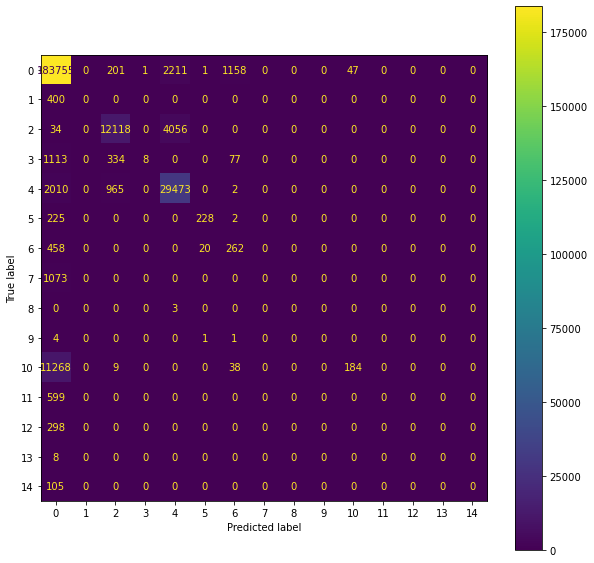

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(mnb, features_test, labels_test, ax=ax)
plt.show()

In [77]:
print(classification_report(labels_test, y_pred, target_names=labels,zero_division=1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95    187374
           1       1.00      0.00      0.00       400
           2       0.89      0.75      0.81     16208
           3       0.89      0.01      0.01      1532
           4       0.82      0.91      0.86     32450
           5       0.91      0.50      0.65       455
           6       0.17      0.35      0.23       740
           7       1.00      0.00      0.00      1073
           8       1.00      0.00      0.00         3
           9       1.00      0.00      0.00         6
          10       0.80      0.02      0.03     11499
          11       1.00      0.00      0.00       599
          12       1.00      0.00      0.00       298
          13       1.00      0.00      0.00         8
          14       1.00      0.00      0.00       105

    accuracy                           0.89    252750
   macro avg       0.89      0.23      0.24    252750
weighted avg       0.89   

# Implementing Feature extraction using PCA.

In [78]:
pca = PCA(n_components = 5)

features_train = pca.fit_transform(features_train)

print(np.sum(pca.explained_variance_ratio_))

features_test = pca.transform(features_test)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

0.8554958620259546


((1010996, 5), (252750, 5), (1010996,), (252750,))

In [101]:
for i in range(15):
    print(str(i)+"->"+lab.inverse_transform([i]))

['0->BENIGN']
['1->Bot']
['2->DDoS']
['3->DoS_GoldenEye']
['4->DoS_Hulk']
['5->DoS_Slowhttptest']
['6->DoS_slowloris']
['7->FTPPatator']
['8->Heartbleed']
['9->Infiltration']
['10->PortScan']
['11->SSHPatator']
['12->Web_Attack_Brute_Force']
['13->Web_Attack_Sql_Injection']
['14->Web_Attack_XSS']


# Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier 

In [80]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(features_train,labels_train)

#Predict the response for test dataset
y_pred = clf.predict(features_test)

In [81]:
print('Score of Decision Tree classification model is {}'.format(accuracy_score(labels_test, y_pred)))

Score of Decision Tree classification model is 0.9870623145400593


In [82]:
cf_matrix = confusion_matrix(labels_test, y_pred)

In [83]:
cf_matrix

array([[186003,    108,     24,     64,     48,      6,     10,      1,
             0,      4,   1091,      6,      2,      3,      4],
       [   108,    292,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     4,      0,  16084,      0,    120,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    58,      0,      0,   1471,      1,      2,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    23,      0,    111,      3,  32311,      0,      0,      0,
             0,      0,      2,      0,      0,      0,      0],
       [     5,      0,      0,      0,      0,    448,      2,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      1,      0,      1,    734,      1,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      0,  

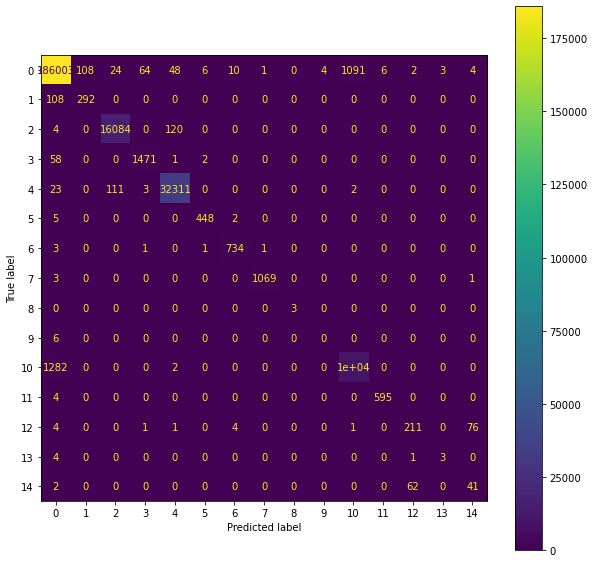

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, features_test, labels_test, ax=ax)
plt.show()

In [85]:
print(classification_report(labels_test, y_pred, target_names=labels,zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    187374
           1       0.73      0.73      0.73       400
           2       0.99      0.99      0.99     16208
           3       0.96      0.96      0.96      1532
           4       0.99      1.00      1.00     32450
           5       0.98      0.98      0.98       455
           6       0.98      0.99      0.99       740
           7       1.00      1.00      1.00      1073
           8       1.00      1.00      1.00         3
           9       0.00      0.00      0.00         6
          10       0.90      0.89      0.90     11499
          11       0.99      0.99      0.99       599
          12       0.76      0.71      0.74       298
          13       0.50      0.38      0.43         8
          14       0.34      0.39      0.36       105

    accuracy                           0.99    252750
   macro avg       0.81      0.80      0.80    252750
weighted avg       0.99   

# KNN Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(features_train, labels_train)
y_pred = classifier.predict(features_test)

In [87]:
print('Score of KNN classification model is {}'.format(accuracy_score(labels_test, y_pred)))

Score of KNN classification model is 0.9874144411473789


In [88]:
cf_matrix = confusion_matrix(labels_test, y_pred)

In [89]:
cf_matrix

array([[186367,    100,     21,     47,     42,      7,      3,      2,
             0,      0,    777,      4,      3,      0,      1],
       [   110,    289,      1,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,  15981,      0,    224,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    44,      0,      0,   1485,      1,      2,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    20,      0,     69,      1,  32360,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     4,      0,      0,      0,      1,    449,      0,      0,
             0,      0,      1,      0,      0,      0,      0],
       [    11,      0,      0,      1,      0,      2,    726,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     2,      0,      0,      0,  

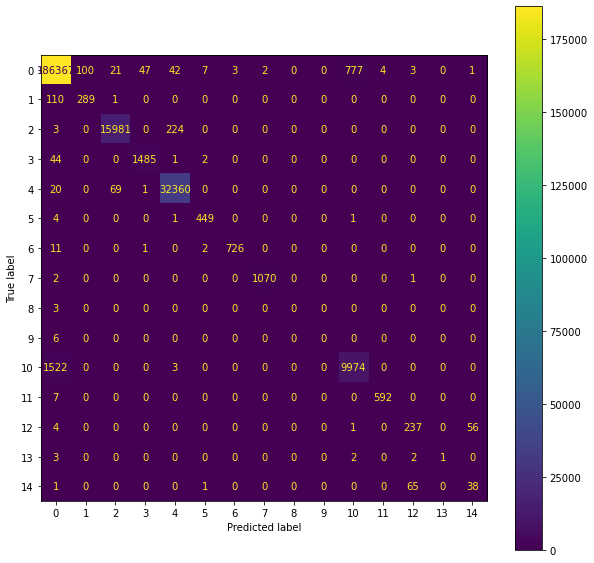

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(classifier, features_test, labels_test, ax=ax)
plt.show()

In [91]:
print(classification_report(labels_test, y_pred, target_names=labels,zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    187374
           1       0.74      0.72      0.73       400
           2       0.99      0.99      0.99     16208
           3       0.97      0.97      0.97      1532
           4       0.99      1.00      0.99     32450
           5       0.97      0.99      0.98       455
           6       1.00      0.98      0.99       740
           7       1.00      1.00      1.00      1073
           8       1.00      0.00      0.00         3
           9       1.00      0.00      0.00         6
          10       0.93      0.87      0.90     11499
          11       0.99      0.99      0.99       599
          12       0.77      0.80      0.78       298
          13       1.00      0.12      0.22         8
          14       0.40      0.36      0.38       105

    accuracy                           0.99    252750
   macro avg       0.92      0.72      0.73    252750
weighted avg       0.99   

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_reg = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')

In [94]:
log_reg.fit(features_train, labels_train)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

In [95]:
y_pred = log_reg.predict(features_test)

In [96]:
print('Score of Logistic Regression model is {}'.format(accuracy_score(labels_test, y_pred)))

Score of Logistic Regression model is 0.9180336300692383


In [97]:
cf_matrix = confusion_matrix(labels_test, y_pred)

In [98]:
print(cf_matrix)

[[184180      0    160    231    140      0      0    100      0      0
    2563      0      0      0      0]
 [   394      0      6      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   148      0  13957      0   2103      0      0      0      0      0
       0      0      0      0      0]
 [   863      0    345      1    323      0      0      0      0      0
       0      0      0      0      0]
 [  1855      0   3124      1  27450      0     20      0      0      0
       0      0      0      0      0]
 [   455      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   699      0      0      0      0      0     41      0      0      0
       0      0      0      0      0]
 [  1073      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     1      0      0      0      0      0      0      0      2      0
       0      0      0      0      0]
 [     5  

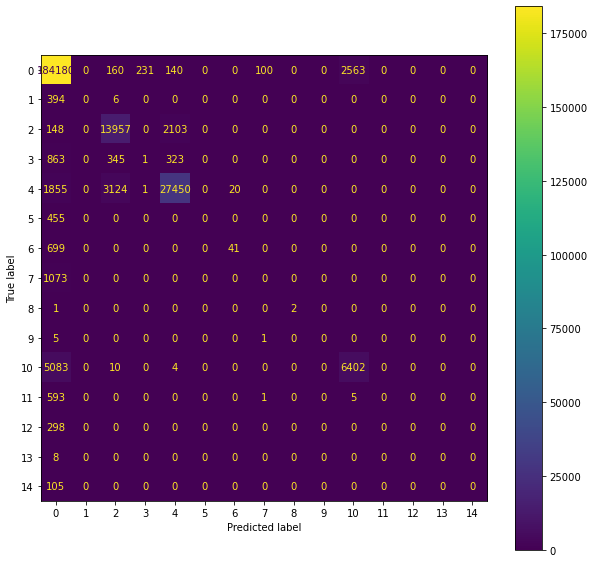

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_reg, features_test, labels_test, ax=ax)
plt.show()

In [100]:
print(classification_report(labels_test, y_pred, target_names=labels,zero_division=1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    187374
           1       1.00      0.00      0.00       400
           2       0.79      0.86      0.83     16208
           3       0.00      0.00      0.00      1532
           4       0.91      0.85      0.88     32450
           5       1.00      0.00      0.00       455
           6       0.67      0.06      0.10       740
           7       0.00      0.00      0.00      1073
           8       1.00      0.67      0.80         3
           9       1.00      0.00      0.00         6
          10       0.71      0.56      0.63     11499
          11       1.00      0.00      0.00       599
          12       1.00      0.00      0.00       298
          13       1.00      0.00      0.00         8
          14       1.00      0.00      0.00       105

    accuracy                           0.92    252750
   macro avg       0.80      0.26      0.28    252750
weighted avg       0.91   